In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

**<h1>loading the datasets**

In [ ]:
df1 = pd.read_csv("/content/dataset_1_colon_cancer.csv")
df2 = pd.read_csv("/content/dataset_2_colon_cancer.csv")

In [ ]:
# The first five rows of both datasets
print("Dataset 1:")
print(df1.head())

print("\nDataset 2:")
print(df2.head())

Dataset 1:
   AGE  CEA Level Colonoscopy Result  Polyp Size (mm) Family History  \
0   78  17.361410             Normal        14.969663             No   
1   68  14.008226             Normal         9.495306            Yes   
2   54  12.445401             Normal        44.941506            Yes   
3   82   4.139308           Abnormal         4.931454             No   
4   47   8.935027             Normal        26.701058             No   

   Type of Colon Cancer  
0                     1  
1                     1  
2                     3  
3                     1  
4                     2  

Dataset 2:
   Tumor Grade Biopsy Result Lymph Node Involvement Bowel Obstruction  \
0            3      Positive                    Yes               Yes   
1            3      Negative                    Yes               Yes   
2            2      Negative                     No                No   
3            1      Negative                    Yes                No   
4            1      Neg

In [ ]:
merged_df = pd.merge(df1, df2, on='Type of Colon Cancer', how='outer')

# Display the merged dataset
print(merged_df)

       AGE  CEA Level Colonoscopy Result  Polyp Size (mm) Family History  \
0       78  17.361410             Normal        14.969663             No   
1       78  17.361410             Normal        14.969663             No   
2       78  17.361410             Normal        14.969663             No   
3       78  17.361410             Normal        14.969663             No   
4       78  17.361410             Normal        14.969663             No   
...    ...        ...                ...              ...            ...   
10054   59  16.684683             Normal        15.558964            Yes   
10055   59  16.684683             Normal        15.558964            Yes   
10056   59  16.684683             Normal        15.558964            Yes   
10057   59  16.684683             Normal        15.558964            Yes   
10058   59  16.684683             Normal        15.558964            Yes   

       Type of Colon Cancer  Tumor Grade Biopsy Result Lymph Node Involvement  \
0     

**<h1>Exploratory Data Analysis**

In [ ]:
#shape of both the datasets
print("Merged_df 1:")
print(merged_df.shape)

Merged_df 1:
(10059, 11)


In [ ]:
# Column names of both the datasets
print("merged_df_Column_names")
print(merged_df.columns)


merged_df_Column_names
Index(['AGE', 'CEA Level', 'Colonoscopy Result', 'Polyp Size (mm)',
       'Family History', 'Type of Colon Cancer', 'Tumor Grade',
       'Biopsy Result', 'Lymph Node Involvement', 'Bowel Obstruction',
       'Smoking History'],
      dtype='object')


In [ ]:
# data types and null value identification
print("Dataset:")
print(merged_df.info())

Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10059 entries, 0 to 10058
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     10059 non-null  int64  
 1   CEA Level               10059 non-null  float64
 2   Colonoscopy Result      10059 non-null  object 
 3   Polyp Size (mm)         10059 non-null  float64
 4   Family History          10059 non-null  object 
 5   Type of Colon Cancer    10059 non-null  int64  
 6   Tumor Grade             10059 non-null  int64  
 7   Biopsy Result           10059 non-null  object 
 8   Lymph Node Involvement  10059 non-null  object 
 9   Bowel Obstruction       10059 non-null  object 
 10  Smoking History         10059 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 864.6+ KB
None


In [ ]:
# Identifying categorical columns for each dataset
categorical_columns = ['Colonoscopy Result', 'Family History', 'Biopsy Result', 'Lymph Node Involvement', 'Bowel Obstruction', 'Smoking History']


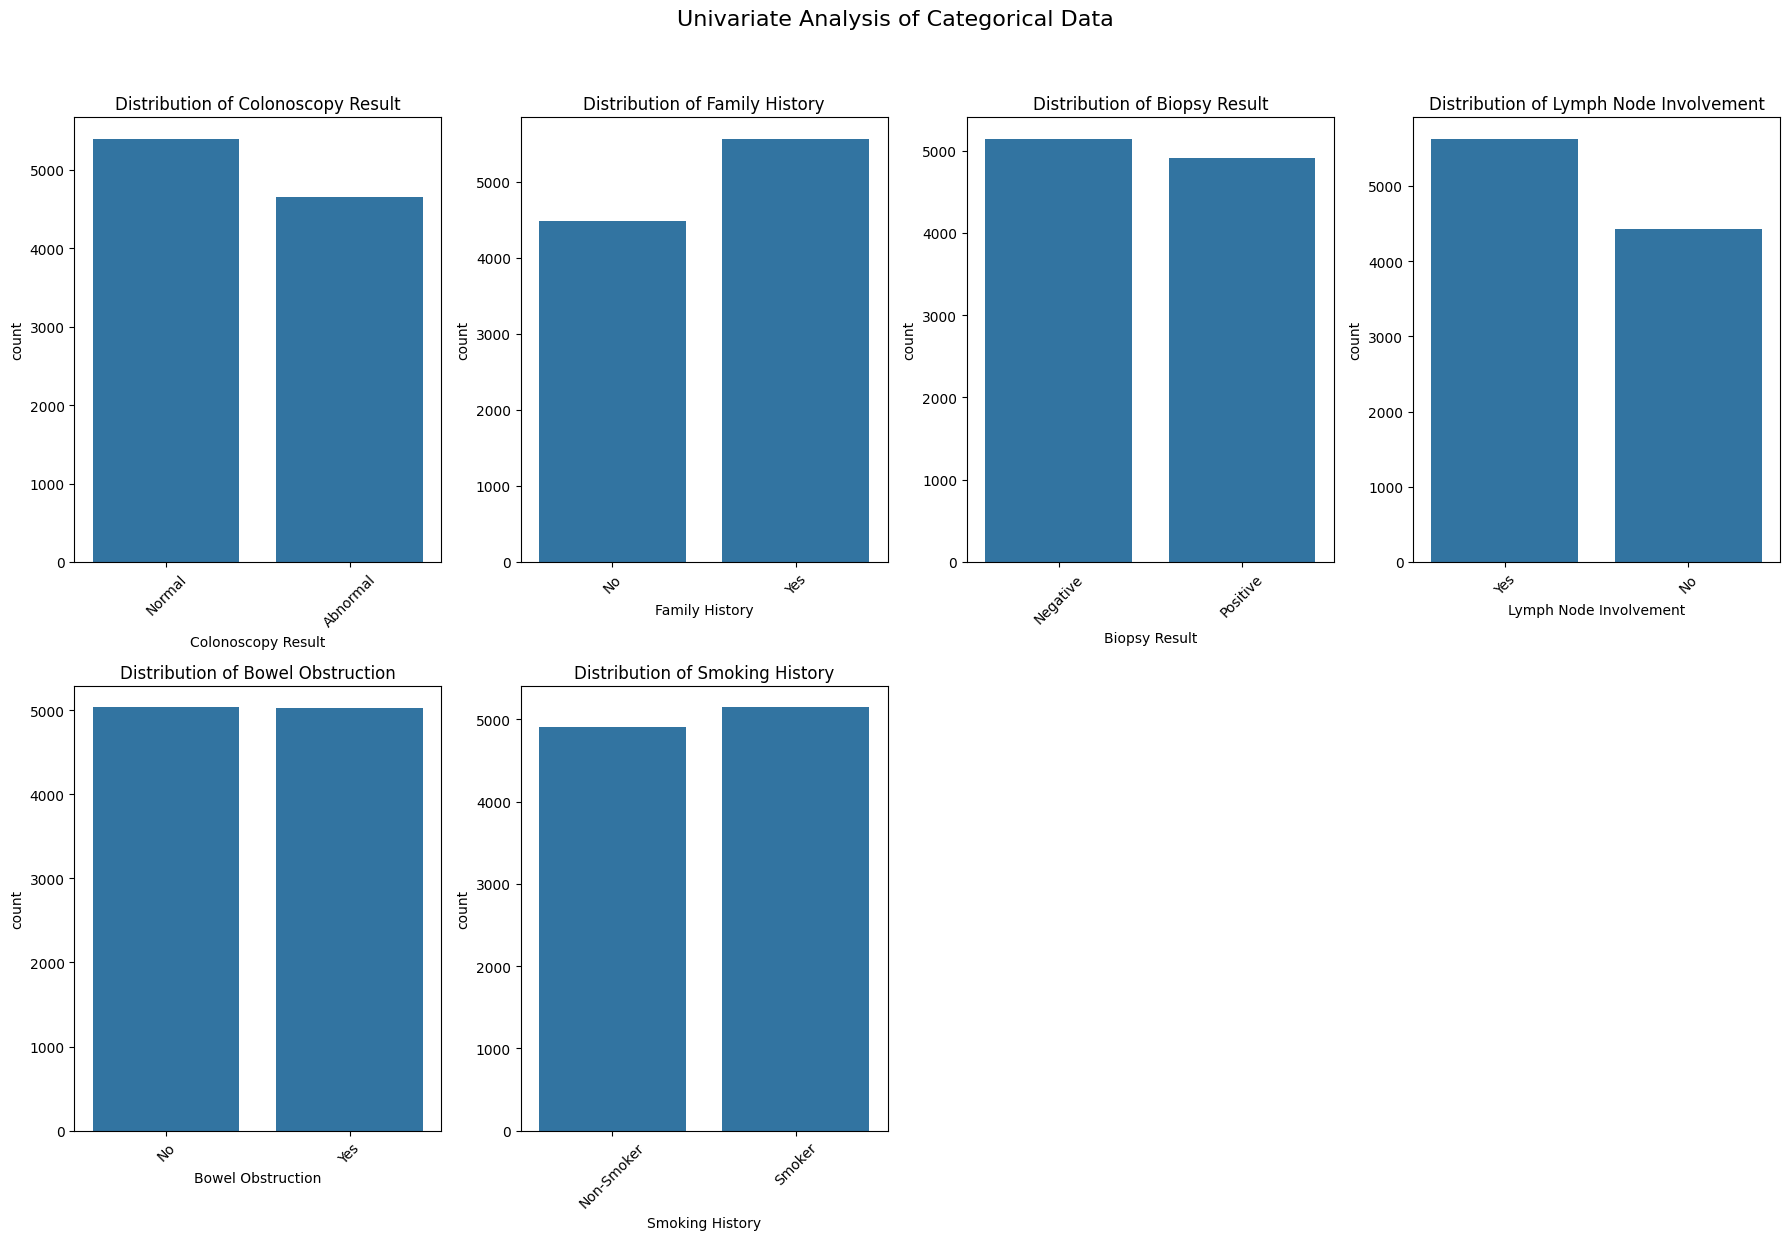

In [ ]:
plt.figure(figsize=(18, 12))
plt.suptitle('Univariate Analysis of Categorical Data', fontsize=16, y=1.03)

# Looping through categorical columns and creating countplots
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 4, i)  # Adjust the grid layout as per the number of columns
    sns.countplot(x= merged_df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<Figure size 1800x1200 with 0 Axes>

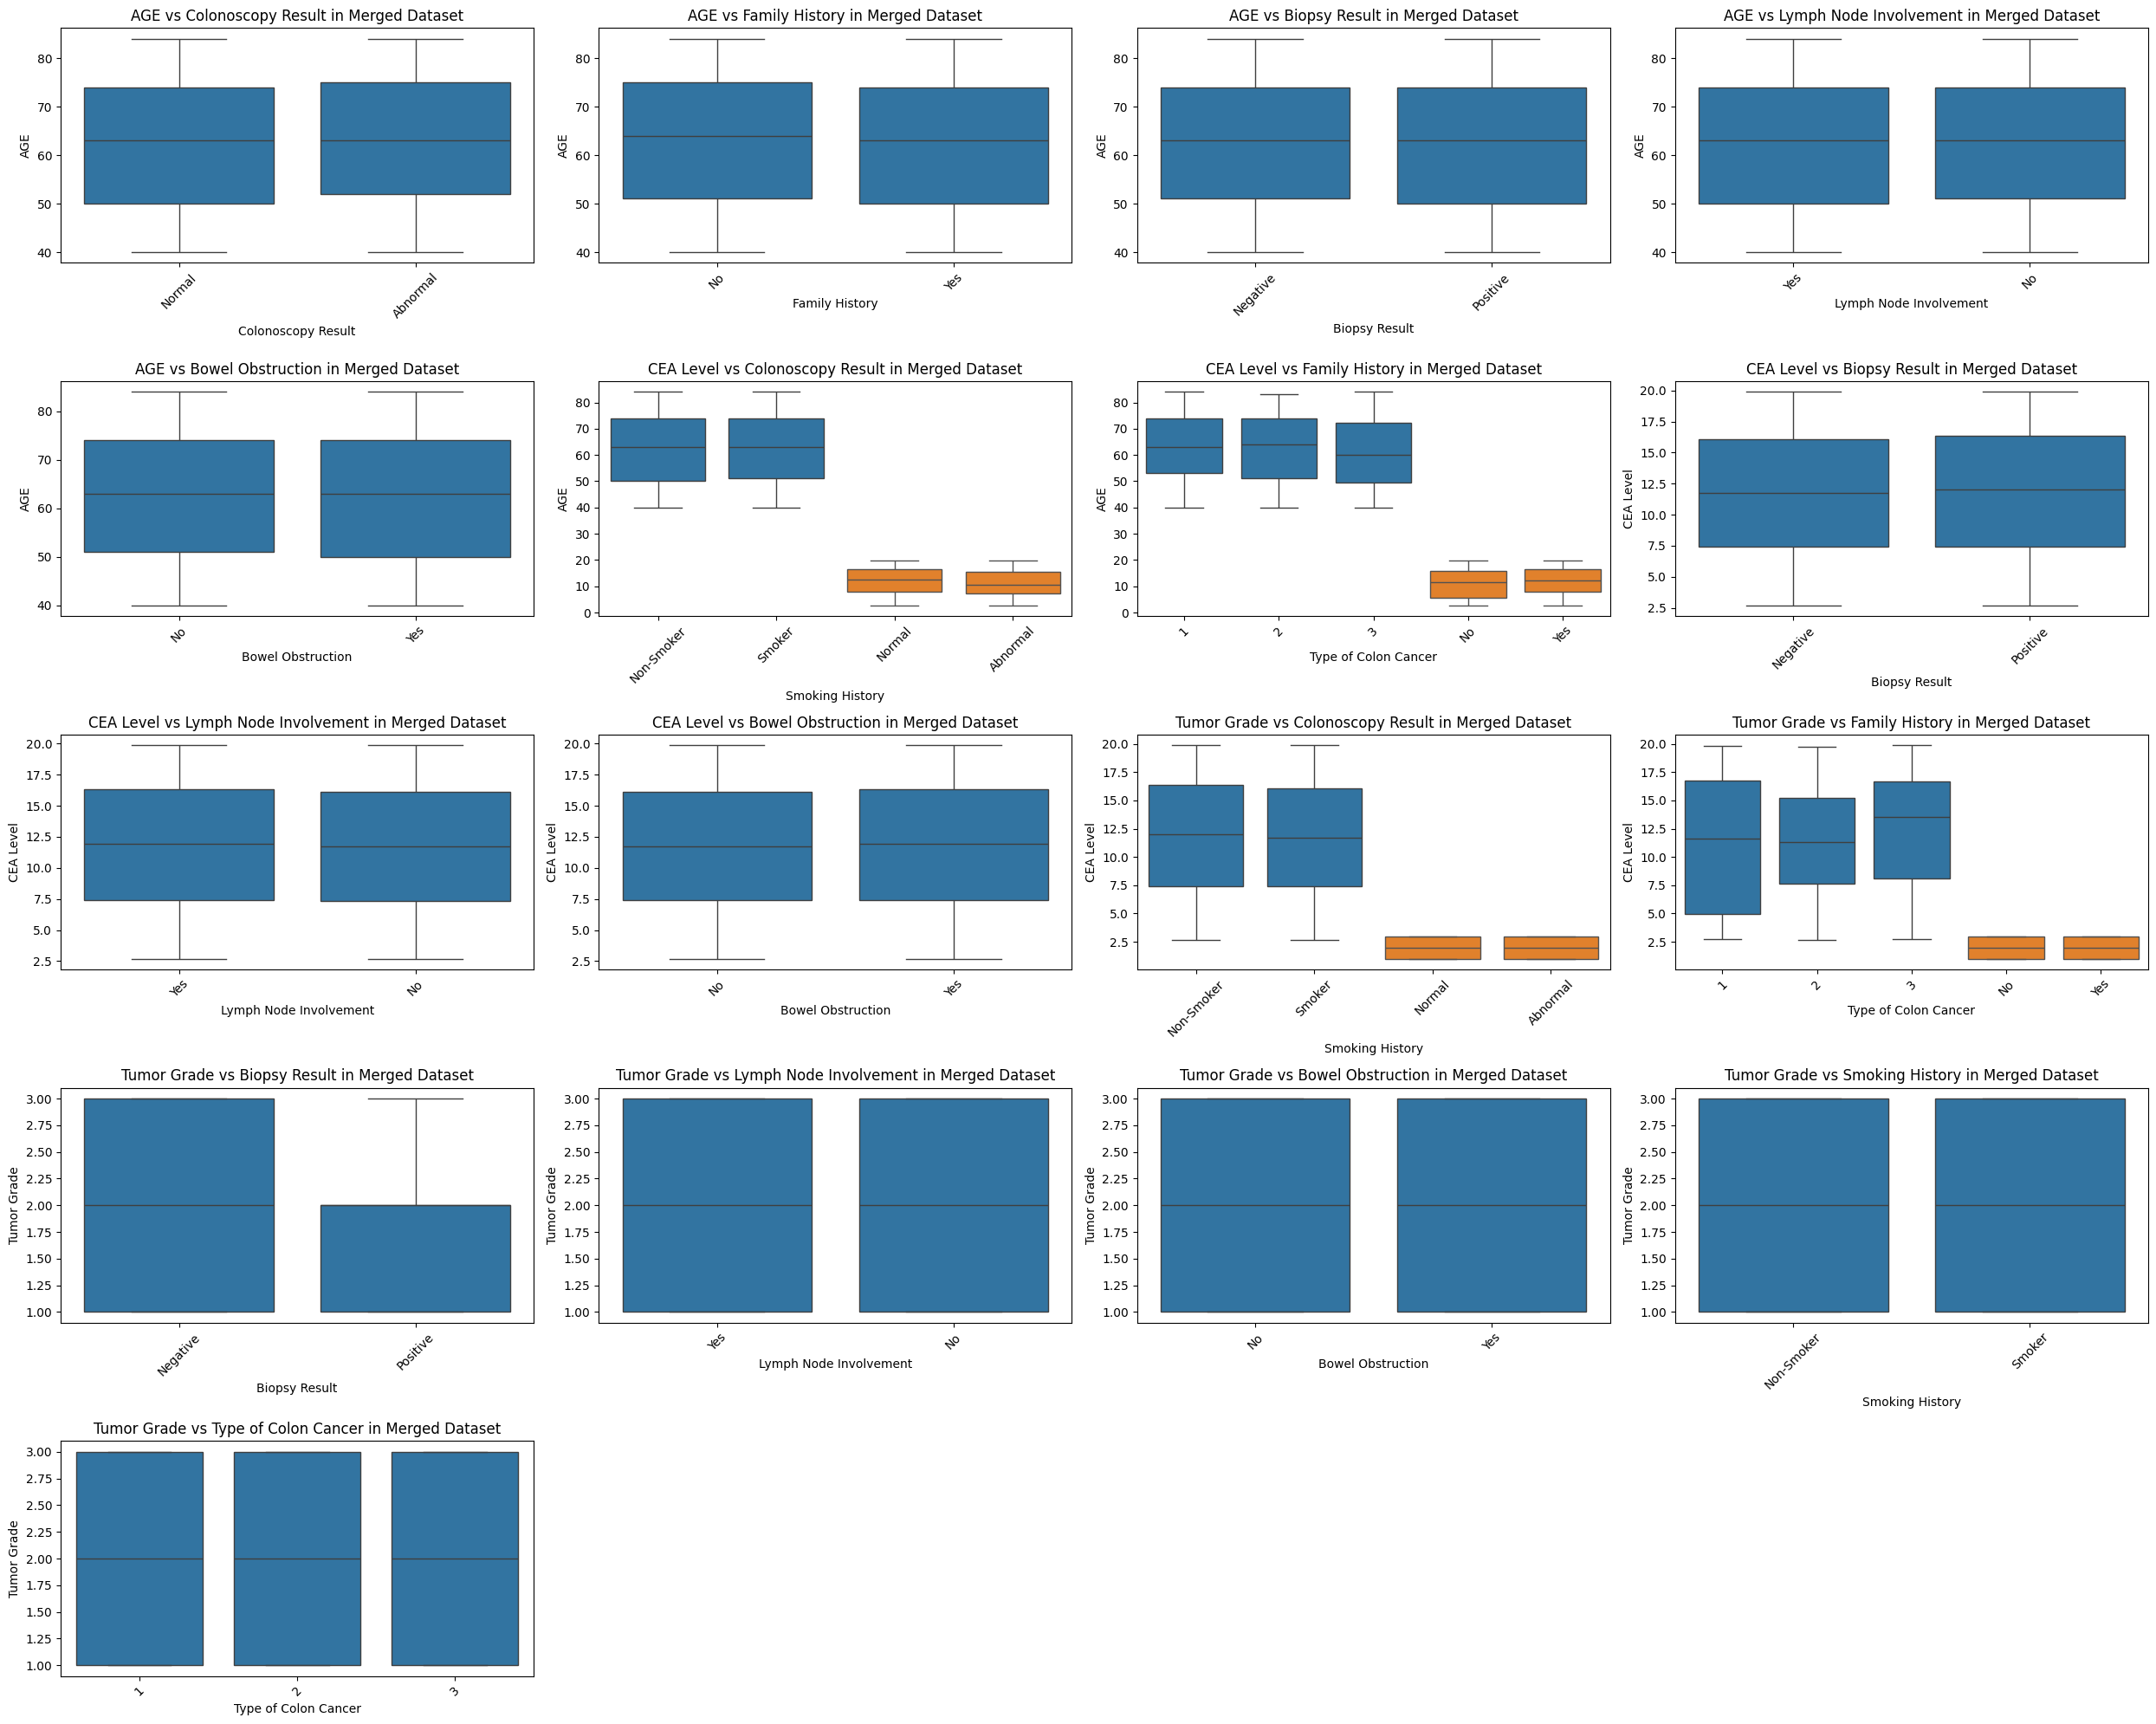

In [ ]:
# Bivariate Numerical vs Categorical Analysis for both datasets

# Dataset 1: Numerical vs Categorical (AGE, CEA Level vs Colonoscopy Result, Family History)
plt.figure(figsize=(18, 12))
plt.suptitle('Bivariate Analysis: Numerical vs Categorical', fontsize=16, y=1.03)


numerical_cols_merged = ['AGE', 'CEA Level', 'Tumor Grade']
categorical_cols_merged = ['Colonoscopy Result', 'Family History', 'Biopsy Result',
                           'Lymph Node Involvement', 'Bowel Obstruction', 'Smoking History',
                           'Type of Colon Cancer']

# Adjust the size of the figure
plt.figure(figsize=(25, 20))

# Loop through numerical and categorical columns for plotting boxplots
for i, num_col in enumerate(numerical_cols_merged, 1):
    for j, cat_col in enumerate(categorical_cols_merged, 1):
        plt.subplot(5, 4, (i-1)*5 + j)  # Adjust grid to fit all plots
        sns.boxplot(x=merged_df[cat_col], y=merged_df[num_col])
        plt.title(f'{num_col} vs {cat_col} in Merged Dataset')
        plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

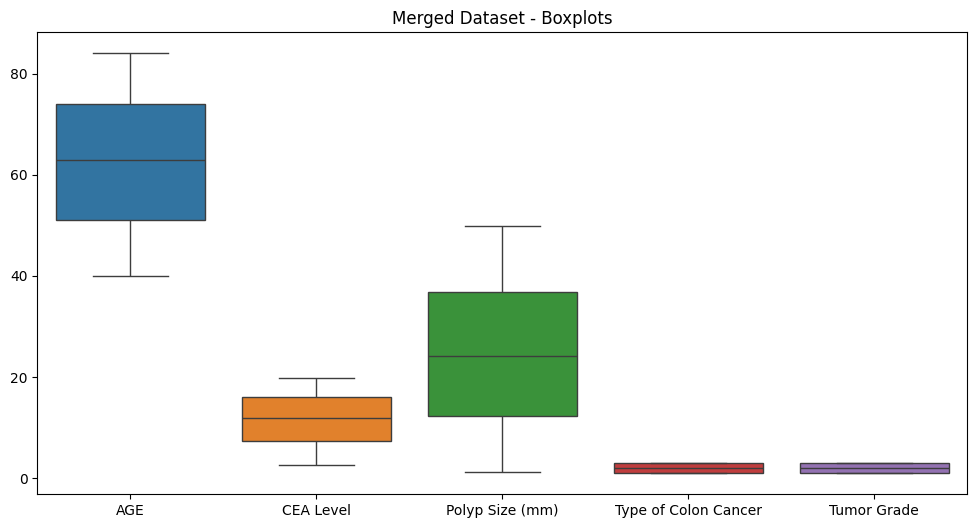

Merged Dataset - Z-score Outliers (Threshold = 2):
Empty DataFrame
Columns: [AGE, CEA Level, Colonoscopy Result, Polyp Size (mm), Family History, Type of Colon Cancer, Tumor Grade, Biopsy Result, Lymph Node Involvement, Bowel Obstruction, Smoking History]
Index: []


In [ ]:
from scipy.stats import zscore

# Function to detect outliers using Z-score with a threshold of 2
def detect_zscore_outliers(df, threshold=2):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    z_scores = np.abs(zscore(df[numerical_cols]))
    outliers = (z_scores > threshold).any(axis=1)
    outliers_df = df[outliers]
    return outliers_df

# Function to plot boxplots
def plot_boxplots(df, title):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[numerical_cols])
    plt.title(title)
    plt.show()

# Assuming `merged_df` is the DataFrame after merging df1 and df2
# Detect outliers with Z-score threshold of 2 for the merged dataset
merged_zscore_outliers = detect_zscore_outliers(merged_df, threshold=2)

# Visualize boxplots for the merged dataset
plot_boxplots(merged_df, "Merged Dataset - Boxplots")

# Print the outliers found using Z-score method for merged dataset
print("Merged Dataset - Z-score Outliers (Threshold = 2):")
print(merged_zscore_outliers)

Correlation Analysis


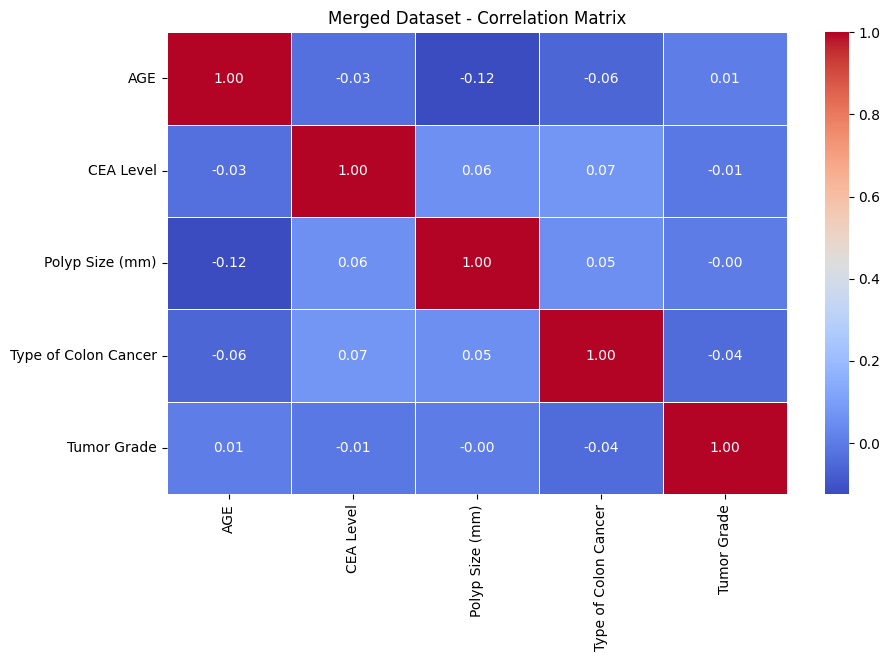

In [ ]:
def plot_correlation_matrix(df, title):
    numerical_cols = df.select_dtypes(include=[np.number]).columns  # Selecting numerical columns
    correlation_matrix = df[numerical_cols].corr()  # Calculate correlation matrix
    plt.figure(figsize=(10, 6))  # Size of the figure
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Heatmap
    plt.title(title)  # Title of the plot
    plt.show()

# Calculate and plot correlation matrices for the merged dataset
print("Correlation Analysis")

# Merged Dataset Correlation Matrix
plot_correlation_matrix(merged_df, "Merged Dataset - Correlation Matrix")

***Target column analysis***

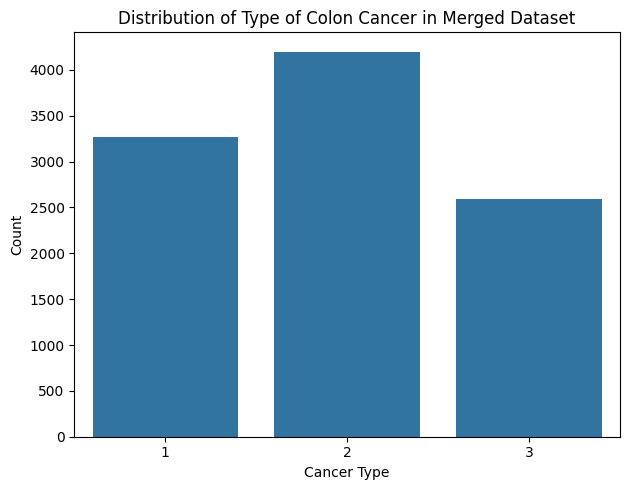

In [ ]:
plt.figure(figsize=(12, 5))

# Plot distribution for Merged Dataset (Type of Colon Cancer)
plt.subplot(1, 2, 1)
sns.countplot(x='Type of Colon Cancer', data=merged_df)
plt.title("Distribution of Type of Colon Cancer in Merged Dataset")
plt.xlabel("Cancer Type")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

**<h2>Data Preparation and Model building**

Identifying input(x) and output(y) in both the dataset simultaneously

In [ ]:
# Segregate inputs and outputs for Merged Dataset
X_merged = merged_df.drop(columns=['Type of Colon Cancer'])
y_merged = merged_df['Type of Colon Cancer']

# Display shapes of inputs and outputs for the merged dataset
print("Merged Dataset - Inputs (X_merged) shape:", X_merged.shape)
print("Merged Dataset - Output (y_merged) shape:", y_merged.shape)


Merged Dataset - Inputs (X_merged) shape: (10059, 10)
Merged Dataset - Output (y_merged) shape: (10059,)


# **Spliting the Datasets into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split

# Merged Dataset: Train-test split
X_merged_train, X_merged_test, y_merged_train, y_merged_test = train_test_split(
    X_merged, y_merged, test_size=0.20, random_state=42
)

# Display shapes of the resulting splits for the merged dataset
print("Merged Dataset - X_merged_train shape:", X_merged_train.shape)
print("Merged Dataset - X_merged_test shape:", X_merged_test.shape)
print("Merged Dataset - y_merged_train shape:", y_merged_train.shape)
print("Merged Dataset - y_merged_test shape:", y_merged_test.shape)


Merged Dataset - X_merged_train shape: (8047, 10)
Merged Dataset - X_merged_test shape: (2012, 10)
Merged Dataset - y_merged_train shape: (8047,)
Merged Dataset - y_merged_test shape: (2012,)


**<h2>Applying Data Preparation on Training Data**

***Separate numerical and Categorical Variables***

In [ ]:
# Separate numerical and categorical variables for the Merged Dataset
numerical_features_merged = ['AGE', 'CEA Level', 'Polyp Size (mm)', 'Tumor Grade']
categorical_features_merged = ['Colonoscopy Result', 'Family History', 'Biopsy Result', 'Lymph Node Involvement', 'Bowel Obstruction', 'Smoking History']

X_merged_train_num = X_merged_train[numerical_features_merged]
X_merged_train_cat = X_merged_train[categorical_features_merged]

# Display the separated numerical and categorical parts for the Merged Dataset
print("Merged Dataset - Numerical Features (X_merged_train_num):\n", X_merged_train_num.head())
print("Merged Dataset - Categorical Features (X_merged_train_cat):\n", X_merged_train_cat.shape)


Merged Dataset - Numerical Features (X_merged_train_num):
       AGE  CEA Level  Polyp Size (mm)  Tumor Grade
8224   84   8.151738        27.139594            2
1544   48   3.734953        21.782403            2
7019   72   7.354171        32.919599            1
1718   75   4.152752        17.341459            2
8572   40  10.092404        30.961258            3
Merged Dataset - Categorical Features (X_merged_train_cat):
 (8047, 6)


# **Transformation of Numerical Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler for the merged dataset
scaler_merged = StandardScaler()

# Fit and transform on the merged dataset's numerical training data
X_merged_train_num_scaled = scaler_merged.fit_transform(X_merged_train_num)

# Convert scaled data back to DataFrame for easier inspection
X_merged_train_num_scaled = pd.DataFrame(X_merged_train_num_scaled, columns=numerical_features_merged, index=X_merged_train.index)

# Display scaled numerical data for the merged dataset
print("Merged Dataset - Scaled Numerical Features:\n", X_merged_train_num_scaled.head())
print("Shape of Merged Dataset - Scaled Numerical Features:", X_merged_train_num_scaled.shape)

Merged Dataset - Scaled Numerical Features:
            AGE  CEA Level  Polyp Size (mm)  Tumor Grade
8224  1.638083  -0.642210         0.184528    -0.025626
1544 -1.096857  -1.480819        -0.199132    -0.025626
7019  0.726436  -0.793643         0.598469    -1.260440
1718  0.954348  -1.401492        -0.517175    -0.025626
8572 -1.704622  -0.273739         0.458221     1.209188
Shape of Merged Dataset - Scaled Numerical Features: (8047, 4)


In [ ]:
# Analyze properties of scaled numerical features for the Merged Dataset
mean_merged = X_merged_train_num_scaled.mean(axis=0)
std_dev_merged = X_merged_train_num_scaled.std(axis=0)

print("Merged Dataset - Scaled Numerical Features Mean:\n", mean_merged)
print("\nMerged Dataset - Scaled Numerical Features Standard Deviation:\n", std_dev_merged)


Merged Dataset - Scaled Numerical Features Mean:
 AGE                3.664412e-17
CEA Level         -7.019777e-17
Polyp Size (mm)   -1.863111e-16
Tumor Grade       -2.613653e-16
dtype: float64

Merged Dataset - Scaled Numerical Features Standard Deviation:
 AGE                1.000062
CEA Level          1.000062
Polyp Size (mm)    1.000062
Tumor Grade        1.000062
dtype: float64


In [ ]:
# Describe statistics for transformed numerical data in the Merged Dataset
print("Merged Dataset - Scaled Numerical Features Statistics:\n")
print(pd.DataFrame(X_merged_train_num_scaled, columns=X_merged_train_num.columns).describe())


Merged Dataset - Scaled Numerical Features Statistics:

                AGE     CEA Level  Polyp Size (mm)   Tumor Grade
count  8.047000e+03  8.047000e+03     8.047000e+03  8.047000e+03
mean   3.664412e-17 -7.019777e-17    -1.863111e-16 -2.613653e-16
std    1.000062e+00  1.000062e+00     1.000062e+00  1.000062e+00
min   -1.704622e+00 -1.679288e+00    -1.671230e+00 -1.260440e+00
25%   -8.689457e-01 -7.823754e-01    -8.829993e-01 -1.260440e+00
50%    4.270099e-02  5.023485e-02    -3.263711e-02 -2.562618e-02
75%    8.783771e-01  9.083676e-01     8.470827e-01  1.209188e+00
max    1.638083e+00  1.584028e+00     1.810730e+00  1.209188e+00


# **Transformation of categorical Data**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Apply Ordinal Encoding for the merged dataset on categorical columns
ordinal_encoder_merged = OrdinalEncoder()

# Fit and transform the categorical features (using X_merged_train_cat for the encoding)
X_merged_cat_encoded = ordinal_encoder_merged.fit_transform(X_merged_train_cat)

# Convert the encoded categorical data back to DataFrame for easier inspection
X_merged_cat_encoded_df = pd.DataFrame(X_merged_cat_encoded, columns=categorical_features_merged, index=X_merged_train_cat.index)

# Display the encoded categorical data for the merged dataset
print("Merged Dataset - Ordinal Encoded Categorical Features:\n", X_merged_cat_encoded_df.head())

# Ensure that the number of rows is consistent
print("Shape of Merged Dataset - Ordinal Encoded Categorical Features:", X_merged_cat_encoded_df.shape)


Merged Dataset - Ordinal Encoded Categorical Features:
       Colonoscopy Result  Family History  Biopsy Result  \
8224                 0.0             1.0            0.0   
1544                 1.0             0.0            1.0   
7019                 0.0             1.0            1.0   
1718                 1.0             0.0            1.0   
8572                 0.0             1.0            1.0   

      Lymph Node Involvement  Bowel Obstruction  Smoking History  
8224                     0.0                0.0              0.0  
1544                     1.0                0.0              0.0  
7019                     0.0                0.0              0.0  
1718                     0.0                0.0              1.0  
8572                     1.0                1.0              1.0  
Shape of Merged Dataset - Ordinal Encoded Categorical Features: (8047, 6)


In [ ]:
# Display the value counts of the original categorical columns before encoding
print("Encoded values for Merged Dataset - Colonoscopy Result:")
print(merged_df['Colonoscopy Result'].value_counts())

print("\nEncoded values for Merged Dataset - Family History:")
print(merged_df['Family History'].value_counts())

print("\nEncoded values for Merged Dataset - Biopsy Result:")
print(merged_df['Biopsy Result'].value_counts())

print("\nEncoded values for Merged Dataset - Lymph Node Involvement:")
print(merged_df['Lymph Node Involvement'].value_counts())

print("\nEncoded values for Merged Dataset - Bowel Obstruction:")
print(merged_df['Bowel Obstruction'].value_counts())

print("\nEncoded values for Merged Dataset - Smoking History:")
print(merged_df['Smoking History'].value_counts())


Encoded values for Merged Dataset - Colonoscopy Result:
Colonoscopy Result
Normal      5401
Abnormal    4658
Name: count, dtype: int64

Encoded values for Merged Dataset - Family History:
Family History
Yes    5571
No     4488
Name: count, dtype: int64

Encoded values for Merged Dataset - Biopsy Result:
Biopsy Result
Negative    5148
Positive    4911
Name: count, dtype: int64

Encoded values for Merged Dataset - Lymph Node Involvement:
Lymph Node Involvement
Yes    5628
No     4431
Name: count, dtype: int64

Encoded values for Merged Dataset - Bowel Obstruction:
Bowel Obstruction
No     5037
Yes    5022
Name: count, dtype: int64

Encoded values for Merged Dataset - Smoking History:
Smoking History
Smoker        5148
Non-Smoker    4911
Name: count, dtype: int64


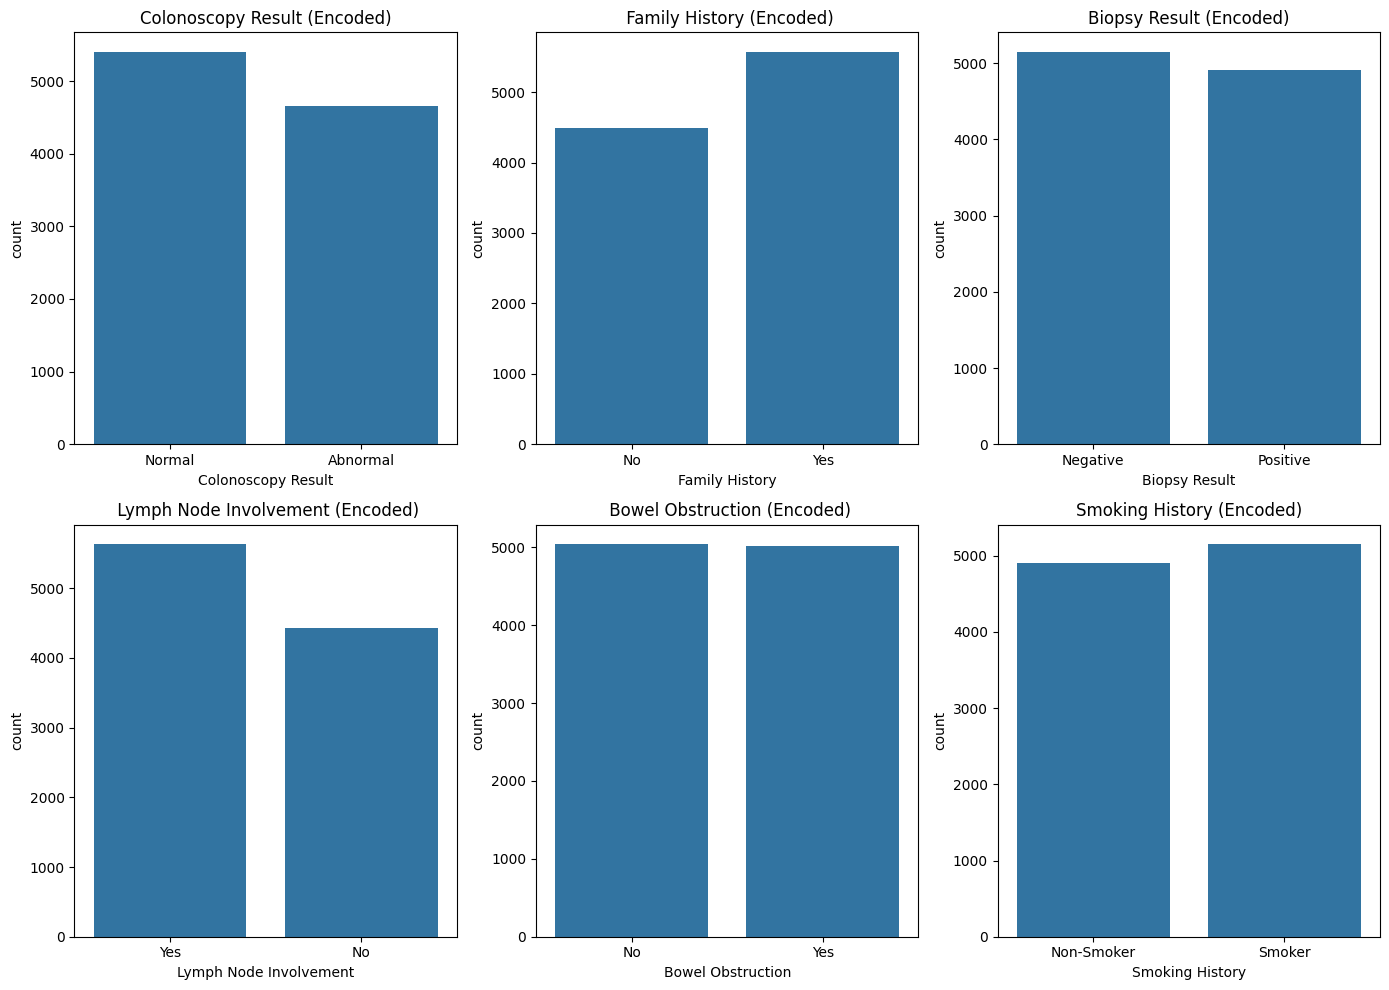

In [ ]:
# Visualizing the distribution of encoded values using bar plots
plt.figure(figsize=(14, 10))

# Dataset 1: Colonoscopy Result
plt.subplot(2, 3, 1)
sns.countplot(x='Colonoscopy Result', data= merged_df)
plt.title("Colonoscopy Result (Encoded)")

# Dataset 1: Family History
plt.subplot(2, 3, 2)
sns.countplot(x='Family History', data=merged_df)
plt.title(" Family History (Encoded)")

# Dataset 2: Biopsy Result
plt.subplot(2, 3, 3)
sns.countplot(x='Biopsy Result', data=merged_df)
plt.title("Biopsy Result (Encoded)")

# Dataset 2: Lymph Node Involvement
plt.subplot(2, 3, 4)
sns.countplot(x='Lymph Node Involvement', data=merged_df)
plt.title(" Lymph Node Involvement (Encoded)")

# Dataset 2: Bowel Obstruction
plt.subplot(2, 3, 5)
sns.countplot(x='Bowel Obstruction', data=merged_df)
plt.title(" Bowel Obstruction (Encoded)")

# Dataset 2: Smoking History
plt.subplot(2, 3, 6)
sns.countplot(x='Smoking History', data=merged_df)
plt.title("Smoking History (Encoded)")

plt.tight_layout()
plt.show()

**<h3>Concatenate Train Numerical and Categorical Transformed Data**

In [ ]:
# Concatenate the scaled numerical features with the encoded categorical features for the merged dataset
X_merged_train_final = pd.concat([X_merged_train_num_scaled, X_merged_cat_encoded_df], axis=1)

# Display the final concatenated data for the merged dataset
print("Merged Dataset - Final Transformed Data:\n", X_merged_train_final.head())
print("Shape of Merged Dataset - Final Transformed Data:", X_merged_train_final.shape)

Merged Dataset - Final Transformed Data:
            AGE  CEA Level  Polyp Size (mm)  Tumor Grade  Colonoscopy Result  \
8224  1.638083  -0.642210         0.184528    -0.025626                 0.0   
1544 -1.096857  -1.480819        -0.199132    -0.025626                 1.0   
7019  0.726436  -0.793643         0.598469    -1.260440                 0.0   
1718  0.954348  -1.401492        -0.517175    -0.025626                 1.0   
8572 -1.704622  -0.273739         0.458221     1.209188                 0.0   

      Family History  Biopsy Result  Lymph Node Involvement  \
8224             1.0            0.0                     0.0   
1544             0.0            1.0                     1.0   
7019             1.0            1.0                     0.0   
1718             0.0            1.0                     0.0   
8572             1.0            1.0                     1.0   

      Bowel Obstruction  Smoking History  
8224                0.0              0.0  
1544              

**<h2>Applying Data Preparation on Test Data**

In [ ]:
# Separate numerical and categorical features for the merged dataset (Test Data)
numerical_features_merged = ['AGE', 'CEA Level', 'Polyp Size (mm)', 'Tumor Grade']  # Add other numerical columns as needed
categorical_features_merged = ['Colonoscopy Result', 'Family History', 'Biopsy Result', 'Lymph Node Involvement', 'Bowel Obstruction', 'Smoking History']  # Add other categorical columns as needed

# Separate numerical and categorical features for the merged dataset (Test Data)
X_merged_test_num = X_merged_test[numerical_features_merged]
X_merged_test_cat = X_merged_test[categorical_features_merged]

# Display the separated parts for the merged dataset
print("Merged Dataset - Numerical Features (X_merged_test_num):\n", X_merged_test_num.head())
print("\nMerged Dataset - Categorical Features (X_merged_test_cat):\n", X_merged_test_cat.head())


Merged Dataset - Numerical Features (X_merged_test_num):
       AGE  CEA Level  Polyp Size (mm)  Tumor Grade
8293   63   2.943638        13.175968            1
3128   59  10.473993        14.428706            2
8559   40  10.092404        30.961258            3
2178   63  19.126084        23.211153            3
107    78   6.769819        49.136552            1

Merged Dataset - Categorical Features (X_merged_test_cat):
      Colonoscopy Result Family History Biopsy Result Lymph Node Involvement  \
8293           Abnormal            Yes      Positive                    Yes   
3128           Abnormal            Yes      Positive                    Yes   
8559           Abnormal            Yes      Positive                     No   
2178             Normal            Yes      Negative                    Yes   
107            Abnormal            Yes      Negative                     No   

     Bowel Obstruction Smoking History  
8293               Yes          Smoker  
3128              

# **Transformation of numerical data**

In [ ]:
# Apply the same scaling transformations as done for the training data (merged dataset)
X_merged_test_num_scaled = scaler_merged.transform(X_merged_test_num)

# Convert scaled data back to DataFrame for easier inspection
X_merged_test_num_scaled = pd.DataFrame(X_merged_test_num_scaled, columns=numerical_features_merged, index=X_merged_test.index)

# Display the scaled numerical features for the merged dataset (test data)
print("Merged Dataset - Scaled Numerical Features (Test Data):\n", X_merged_test_num_scaled.head())


Merged Dataset - Scaled Numerical Features (Test Data):
            AGE  CEA Level  Polyp Size (mm)  Tumor Grade
8293  0.042701  -1.631065        -0.815490    -1.260440
3128 -0.261181  -0.201287        -0.725774    -0.025626
8559 -1.704622  -0.273739         0.458221     1.209188
2178  0.042701   1.441475        -0.096811     1.209188
107   1.182259  -0.904593         1.759862    -1.260440


# **Transformation of categorical data**

In [ ]:
# Transform categorical features using the encoder for the merged dataset
X_merged_test_cat_encoded = ordinal_encoder_merged.transform(X_merged_test_cat)

# Convert the encoded categorical test data back to DataFrame for easier inspection
X_merged_test_cat_encoded = pd.DataFrame(X_merged_test_cat_encoded, columns=categorical_features_merged, index=X_merged_test.index)

# Display the encoded categorical test data for the merged dataset
print("Merged Dataset - Encoded Categorical Test Features:\n", X_merged_test_cat_encoded.head())


Merged Dataset - Encoded Categorical Test Features:
       Colonoscopy Result  Family History  Biopsy Result  \
8293                 0.0             1.0            1.0   
3128                 0.0             1.0            1.0   
8559                 0.0             1.0            1.0   
2178                 1.0             1.0            0.0   
107                  0.0             1.0            0.0   

      Lymph Node Involvement  Bowel Obstruction  Smoking History  
8293                     1.0                1.0              1.0  
3128                     1.0                0.0              0.0  
8559                     0.0                1.0              0.0  
2178                     1.0                0.0              0.0  
107                      0.0                0.0              0.0  


**<h3>Concatenate Test Numerical and Categorical Transformed Data**

In [ ]:
# Concatenate the scaled numerical features with the encoded categorical features for the merged dataset
X_merged_test_transformed = pd.concat([X_merged_test_num_scaled, X_merged_test_cat_encoded], axis=1)

# Display the concatenated test data for the merged dataset
print("Merged Dataset - Concatenated Transformed Test Features:\n", X_merged_test_transformed.head())
print("Shape of Merged Dataset - Concatenated Transformed Test Features:", X_merged_test_transformed.shape)

Merged Dataset - Concatenated Transformed Test Features:
            AGE  CEA Level  Polyp Size (mm)  Tumor Grade  Colonoscopy Result  \
8293  0.042701  -1.631065        -0.815490    -1.260440                 0.0   
3128 -0.261181  -0.201287        -0.725774    -0.025626                 0.0   
8559 -1.704622  -0.273739         0.458221     1.209188                 0.0   
2178  0.042701   1.441475        -0.096811     1.209188                 1.0   
107   1.182259  -0.904593         1.759862    -1.260440                 0.0   

      Family History  Biopsy Result  Lymph Node Involvement  \
8293             1.0            1.0                     1.0   
3128             1.0            1.0                     1.0   
8559             1.0            1.0                     0.0   
2178             1.0            0.0                     1.0   
107              1.0            0.0                     0.0   

      Bowel Obstruction  Smoking History  
8293                1.0              1.0  
31

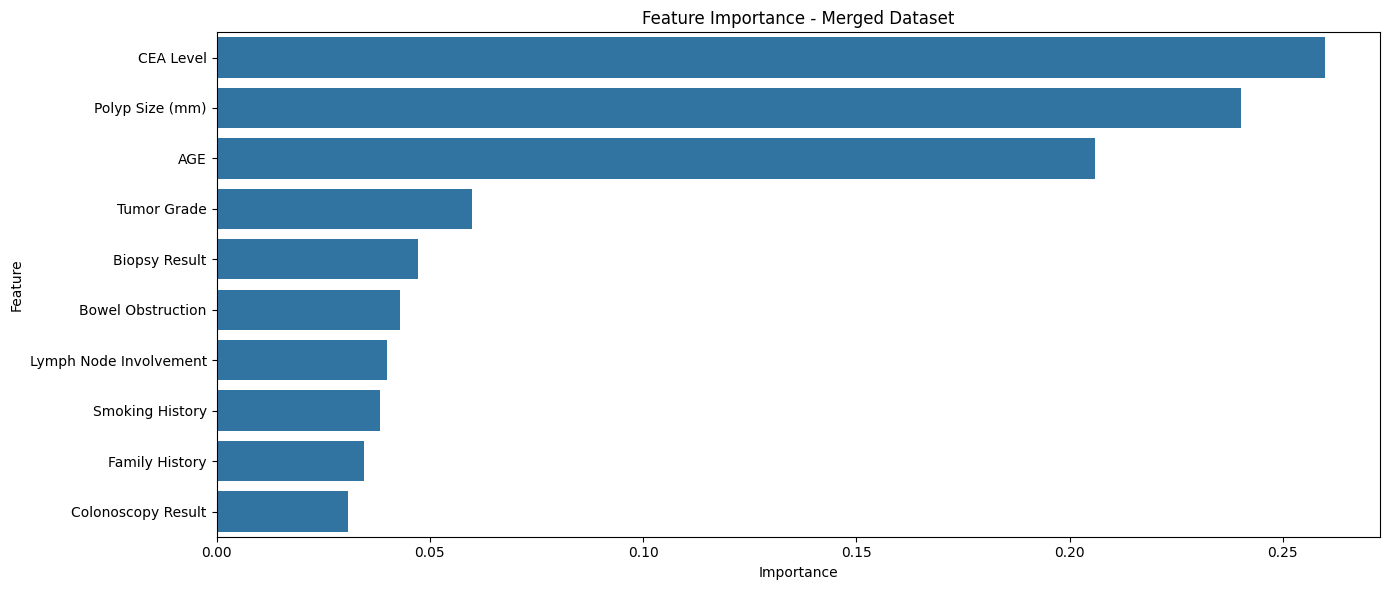

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train a Random Forest Classifier for the merged dataset

# Merged Dataset - Random Forest Classifier
rf_model_merged = RandomForestClassifier(random_state=42)
rf_model_merged.fit(X_merged_train_final, y_merged_train)  # Using the concatenated transformed train data

# 2. Get feature importance for the merged dataset
feature_importance_merged = rf_model_merged.feature_importances_

# 3. Create DataFrame to hold feature importance values for easier interpretation
feature_importance_merged_df = pd.DataFrame({
    'Feature': X_merged_train_final.columns,
    'Importance': feature_importance_merged
}).sort_values(by='Importance', ascending=False)

# 4. Plot the feature importance for the merged dataset
plt.figure(figsize=(14, 6))

# Plot Merged Dataset Feature Importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_merged_df)
plt.title('Feature Importance - Merged Dataset')

plt.tight_layout()
plt.show()


**<h3>Training and Testing Phase**

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the RandomForest Regressor model
rf_model_merged_regressor = RandomForestRegressor(random_state=42)
rf_model_merged_regressor.fit(X_merged_train_final, y_merged_train)

# Check the R-squared on the training set (for reference)
train_r2 = rf_model_merged_regressor.score(X_merged_train_final, y_merged_train)
print(f"Training R-squared: {train_r2:.4f}")


Training R-squared: 0.9585


In [ ]:
from sklearn.metrics import mean_absolute_error

# 1. Get predictions for the merged dataset
y_merged_pred = rf_model_merged.predict(X_merged_test_transformed)  # Replace with your test dataset

# 2. Calculate Mean Absolute Error (MAE) for the merged dataset
mae_merged = mean_absolute_error(y_merged_test, y_merged_pred)  # Replace with your actual test targets

# 3. Print the MAE result
print(f'Mean Absolute Error for Merged Dataset: {mae_merged}')


Mean Absolute Error for Merged Dataset: 0.020874751491053677


Mean Absolute Error for Merged Dataset: 0.020874751491053677


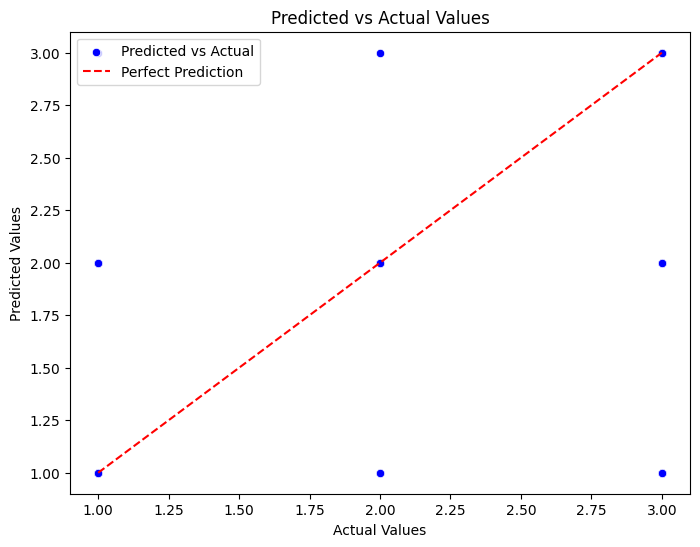

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# Assuming 'rf_model_merged' is the trained model and 'X_merged_test_transformed' is the transformed test data
y_merged_pred = rf_model_merged.predict(X_merged_test_transformed)  # Replace with your test dataset

# Calculate Mean Absolute Error (MAE) for the merged dataset
mae_merged = mean_absolute_error(y_merged_test, y_merged_pred)  # Replace with your actual test targets

# Print the MAE result
print(f'Mean Absolute Error for Merged Dataset: {mae_merged}')

# Plotting Predicted vs Actual values
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_merged_test, y=y_merged_pred, color='blue', label='Predicted vs Actual')

# Plot a line for perfect prediction (y=x)
plt.plot([min(y_merged_test), max(y_merged_test)], [min(y_merged_test), max(y_merged_test)], 'r--', label='Perfect Prediction')

# Adding labels and title
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
from sklearn.metrics import r2_score
r2_merged = r2_score(y_merged_test, y_merged_pred)
print(f'R² for Merged Dataset: {r2_merged}')


R² for Merged Dataset: 0.9463086786134706


R² = 1: Perfect fit (all predicted values match the actual values).

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_merged = mean_squared_error(y_merged_test, y_merged_pred, squared=False)
print(f'RMSE for Merged Dataset: {rmse_merged}')


RMSE for Merged Dataset: 0.17554232920847435


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Calculate the evaluation metrics
mae_merged = mean_absolute_error(y_merged_test, y_merged_pred)
rmse_merged = np.sqrt(((y_merged_test - y_merged_pred) ** 2).mean())
r2_merged = rf_model_merged.score(X_merged_test_transformed, y_merged_test)

# Create a dictionary of results
metrics = {
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'R²'],
    'Value': [mae_merged, rmse_merged, r2_merged]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the table
print(metrics_df)


                           Metric     Value
0       Mean Absolute Error (MAE)  0.020875
1  Root Mean Squared Error (RMSE)  0.175542
2                              R²  0.984095


**<h3> Testing On Unseen Data**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
unseen_df= pd.read_csv("/content/unseen_data.csv")

In [ ]:
print(unseen_df.columns)


Index(['Age', 'CEA Level', 'Colonoscopy Result', 'Polyp Size (mm)',
       'Family History', 'Tumor Grade', 'Biopsy Result',
       'Lymph Node Involvement', 'Bowel Obstruction', 'Smoking History'],
      dtype='object')


In [ ]:
# Rename columns in unseen_df to match the provided column names
unseen_df.rename(columns={
    'Age': 'AGE',
    'CEA Level': 'CEA Level',
    'Colonoscopy Result': 'Colonoscopy Result',
    'Polyp Size': 'Polyp Size (mm)',
    'Family History': 'Family History',
    'Tumor Grade': 'Tumor Grade',
    'Biopsy Result': 'Biopsy Result',
    'Lymph Node Involvement': 'Lymph Node Involvement',
    'Bowel Obstruction': 'Bowel Obstruction',
    'Smoking History': 'Smoking History'
}, inplace=True)


In [ ]:
# Define the numerical and categorical features based on the training data
numerical_features_merged = ['AGE', 'CEA Level', 'Polyp Size (mm)', 'Tumor Grade']
categorical_features_merged = ['Colonoscopy Result', 'Family History', 'Biopsy Result', 'Lymph Node Involvement', 'Bowel Obstruction', 'Smoking History']

# Separate the numerical and categorical features of the unseen data
X_unseen_num = unseen_df[numerical_features_merged]
X_unseen_cat = unseen_df[categorical_features_merged]

# Apply scaling to the numerical features using the scaler from training
X_unseen_num_scaled = scaler_merged.transform(X_unseen_num)
X_unseen_num_scaled.shape

(5, 4)

In [ ]:
# Step 1: Ensure the categorical columns are of the correct data type (string)
categorical_columns = ['Colonoscopy Result', 'Biopsy Result', 'Lymph Node Involvement', 'Bowel Obstruction', 'Smoking History']
unseen_df[categorical_columns] = unseen_df[categorical_columns].astype(str)

# Step 2: Apply Ordinal Encoding to the categorical features using the fitted encoder
X_unseen_cat_encoded = ordinal_encoder_merged.transform(X_unseen_cat)

# Step 3: Convert the encoded categorical unseen data back to DataFrame for easier inspection
X_unseen_cat_encoded_df = pd.DataFrame(X_unseen_cat_encoded, columns=categorical_features_merged, index=unseen_df.index)

# Step 4: Apply the same scaling to the numerical features as the training data
X_unseen_num_scaled = scaler_merged.transform(X_unseen_num)

# Step 5: Convert the scaled numerical unseen data to DataFrame
X_unseen_num_scaled_df = pd.DataFrame(X_unseen_num_scaled, columns=numerical_features_merged, index=unseen_df.index)

# Step 6: Concatenate the scaled numerical features and encoded categorical features
X_unseen_final = pd.concat([X_unseen_num_scaled_df, X_unseen_cat_encoded_df], axis=1)

# Step 7: Display the processed unseen data
print("Processed Unseen Data:")
print(X_unseen_final.head())

Processed Unseen Data:
        AGE  CEA Level  Polyp Size (mm)  Tumor Grade  Colonoscopy Result  \
0 -0.565063  11.471711        -1.401021    -0.025626                 1.0   
1 -0.868946  11.656883        -1.472637     2.444001                 1.0   
2 -1.096857  10.448054        -1.615868     1.209188                 0.0   
3 -2.388357   1.641520        -1.472637    -0.025626                 0.0   
4 -0.337152   2.973786        -1.401021     2.444001                 1.0   

   Family History  Biopsy Result  Lymph Node Involvement  Bowel Obstruction  \
0             0.0            1.0                     0.0                0.0   
1             0.0            0.0                     0.0                1.0   
2             1.0            1.0                     1.0                1.0   
3             0.0            1.0                     0.0                0.0   
4             1.0            1.0                     1.0                0.0   

   Smoking History  
0             -1.0  
1  

In [ ]:
y_unseen_pred = rf_model_merged.predict(X_unseen_final)

# If you have ground truth (unseen target data), you can evaluate the predictions
# For example, if you have `y_unseen_actual` (the actual target values for unseen data):
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you don't have actual values, you can skip evaluation
# Print the predictions
print("Predictions on Simulated Unseen Data:")
print(y_unseen_pred)

Predictions on Simulated Unseen Data:
[3 1 3 3 1]
